In [24]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from urllib.request import urlopen
from PIL import Image
import requests

In [57]:

url ="data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/4gHYSUNDX1BST0ZJTEUAAQEAAAHIAAAAAAQwAABtbnRyUkdCIFhZWiAH4AABAAEAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAACRyWFlaAAABFAAAABRnWFlaAAABKAAAABRiWFlaAAABPAAAABR3dHB0AAABUAAAABRyVFJDAAABZAAAAChnVFJDAAABZAAAAChiVFJDAAABZAAAAChjcHJ0AAABjAAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAAgAAAAcAHMAUgBHAEJYWVogAAAAAAAAb6IAADj1AAADkFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAACSgAAAPhAAAts9YWVogAAAAAAAA9tYAAQAAAADTLXBhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABtbHVjAAAAAAAAAAEAAAAMZW5VUwAAACAAAAAcAEcAbwBvAGcAbABlACAASQBuAGMALgAgADIAMAAxADb/2wBDABQODxIPDRQSEBIXFRQYHjIhHhwcHj0sLiQySUBMS0dARkVQWnNiUFVtVkVGZIhlbXd7gYKBTmCNl4x9lnN+gXz/2wBDARUXFx4aHjshITt8U0ZTfHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHz/wAARCAIDAfcDASIAAhEBAxEB/8QAGwABAAIDAQEAAAAAAAAAAAAAAAEFAgMEBgf/xAA9EAACAQMCBAQEBAUCBgIDAAAAAQIDBBESIQUxQVETImFxBjJCgRQjUpEzobHB0WJyFSQ0guHxNVNDkqL/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/xAAfEQEBAQEAAwEBAQEBAAAAAAAAAQIREiExA0ETIgT/2gAMAwEAAhEDEQA/APZgAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwXvF7Wyypy1T/TEDvIPHXvxXWqTxbx8KK+7OKpxq9qtZrPBeJ171ySWW0kjD8RR/8Ath+54CpxSq4uMqkmmaFfyTTlyHB9G/E0cZ8WH7mDvbdPHjQb9z52+IvL5+6I/F6nlSeepB9Ip3FKqvJUi/ubFJPk0z5tC8mpeWo4vu3j+Zsjf3CqJxqzjKPbmgr6MDxtt8UXNDHjwVeHJyXNF5Zcet7tZSa9QLYGmF1Sm8KaTfLLNuQJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAK7jPEY8PtJT2dR7RQHFx/jMbWDo0p/mPZ4Z4ytcuo3KUm5MmvUncVZVKst5GMYQXJP3ZriMaeX0yZTlFLC29iZPS04tbmiTbeNtyhJp/UTGMZbSnt6I1NIjPIDJxxIbow1b7s2wq6JJtKWOjIJpySktTlH1Sz/I6fw8Zw10KkamOajlY+3Q1VatKS1KDz07IihWjTlKcVlyTjJd0ZVs3jUUajnBtfPp5e/cTnWtqi82iT3jOG0ZCNxdU4Skm61BY1KXNdiHc0p03GPyvfRJbJ+gV30OKTqJRq5VWPXPP/JdcP45OFRRqTU1+nkeTlSahGtS3hn5l/RlhBRubVVaclGrDaa7rugT293b39CvhKWmT6M6T57G8uKDiptzjFeWa6e56DhfG3NqFXdY5k6cejBppXFKtjRJP0NpUSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMak1ThKcnhRWWz59xW9nfXk5Tb0J4in0PS/E1/KjQjb0pYnU5+x5dQpY33ed2akSubTBYb3fXcmvCWlTjv6E1IQjFvKWeWxzSuJJaHJNFRhJ5WXhEZb3/mYupnJCk8FBtMxzjcl56B5xuRUPcIh7Pdk5AyhLTJPmbqlOEtM6C0v6oZNKjFwcnNJr6cbsQk4vMZaWu7Mq6KdSSaUoOEsY22ya3SdNtpZj1XVHdSbqQTq4ltszbVpwmtFSap7eV4zn0foReK2lVdLVpk4treL5TR1WlV0KyqUpeSWzWOXoc1SEVHE04tPZrcmhiS7SXOP6vYI67tSo1dLk1GaymuTRjTq1LbTVpzUoLm19PudX4SV1QjS1a5YcqUvbmmcVunGq4uMm1tUg+q7oNLShxGpScVBtRe8W+he2HH4yahXe76nm/wAHHwZui2nTaf27muNRSUk/s+xEsfQ6VaFWClB5TNh4ey4nXtXocsx6xfI9ZYXauqSl1xus5Ky7AAFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIbwm3yRJy8RrKhZ1JN42wgPH8Xryu7+pVlNaYbRWOhwQqRitVSMksmy4q4k9KzlnN4lRJvaT7Nf0OjLCvdeVxjqinyycLk2zfVkp5i4uL7NHO008MAk2S4SfL+pnTjr5PS87MipSlGTUliSIqNFSDcZRxgyjibxLKwZwjJLaXNchGnN5mqeYpbyTINdSjKHm2lHPNNM1prJaRkpUlCpCjUljbVtJ/9yOCtlTxNOLXR9B1WO3bKNyWhaqT1d4v/AAaYycd0lI3U3RnJxf5c3snyT9yUboSpThLGqnUW7gttXsa5XDlHTKUp4780jCSna1vPDLXR7p/5Nk7ijWpvXSSn0aeGgOihVg6bp14KVOokoy7Nf3MKVKlRuoKU1KnLm30OVTdOk0sThLaS7PozO1qU5S0Vn5ZPaXWJFWN5UVvUhCE/y47pp7x9UcdSu5VlcR/iLaST+ZdzZeUpqGlPW453XVHBSk1NJvbIkLVlO5qNUpt74xlbNr1FOSlCSxyaa9maZvVTlGaw4LStuTJtpRxiT+ZOP35oDdKpuk85jtv1RbcD4m7OpolvTn/JlPX8kqclzlHLRjrcWpR+6LEr6ZTmpwUotNMyKDgPFqdShChU2lHk+5exnGSynlEGQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFP8SXCo2KWUnJ9S4PL/F/mjTj0W+Cz6leRqXTU/Kk0aqrlUeuTwmbpW2qep7RW+3X0RquEovzPfsuhtGpyljOc+5PiZ+ZEZ23Meb7hWyPdbo2qssJSin0NdGLTTxlPozq8GNWLlHCkvp7mbV4U6cZpOk1nng6FThzxKnWcWpP6Zds+pxU5OE9XpjY6o1s4WXJYw13/wDJlYXdKFKrVhOEZKpiS0rdbHDODhHNOSqwx919uhZV6ydCFN4kkvK5LdLtk46lGL3U9/b+6A5VV08lh9TOc/Hjr0xyluls/ciVPqasNPYqM1VeMZbj+lmMt5Zjy9SMZ6GaTXsBjltYwY5aZt0NtETpPmkwcZ07ipHDTeVyMXicm8YMcNYRs0yS1LmBvp1HJtTedaw2+6Ner8upBPeLHKOfXJqc8VXLGz5l4jpdZzcMP5XkyVReO4vZS3ictGpoljm2dEY+JnK5cn2A6rao6dTq+2Geg4bxqVGMVX0uLlpzndHlVOWYrG/c6YOpGUvItG2GB9JpzU4qSaaZmeJseJVqeHreF0zsz1lheU7uipQe/VdjKuoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8t8SVW7jR0wepPHfEDzfVV2LDijk5Ri9Etn0fI46uHLeKz1Z0NSi3l7dDU8zlst2bZc+jPobKVLPM7KVo5YSR2UrHTzOd03MuKFByeEjarOb3W2Cyp0EuhvjBJHO6dplRuwqSflWMmEbepCXPGH2L6UMvMehi6eecFknmeEV60Sj5qaTfPStn/gwVrGXyvVL/AE/4LZUYv6dvQmFCFOTeMrp3HmvgoZWeM5bil3XM0/hJPlCT+x6fT4jWfl6dcGTorKUMvuPM8Hmlw+bx5d2K9hUoNakn3werjTpx20LKJlbU5rGlLPUedXwikocNo1KUdpOUuqfI3/8ABHTa0vxY9kd9G2jazfht6X05pGeurJvQ2l2S3/oZ8l8VFW4Wm5ZjpfT0OOtZzpJ43S5M9W6UceaKb653OWvawqvKW5ZsuJXk55Uexp+ltbrJf3nDFLLjtJFJOj4epPKWTtnUrz6xcsKb82ccjsh8rwckFpkzrg046dzTCIzaWM7exs8am6WJTy+yNGlx5PZkJQlKXl25FR32lRRi9UYyzsuuD0XCpyc1Ki9NSK88JbavY8tGpGEk4rCawy74Zc1vEg1NTx+pb4JweypVFUgpL7rsZnLQk4zxJLLWcrqdRloAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQeK+I8w4lUj9z2x5X4tpxjWpVcbyjgsHl6q1b9WdnD7FyWuSNVOnqmo9C/owUKMUl0FpI1QpRgtkTjc2NbmJiukRjAxkk2QpSlulk511iYQXTczdFNdmbIUZpYcsL0M1RXVtnK6dJGhUVHDTb9jLQpPzJRXsdCpRNipxS5Dpxx6Et4JRSMvPKOlYx7HXoS6EMvRyxoSzu8I3RpLOXlv3MyUZ6qYxXZCVOL3wSiS9RolRj2yY+FFckbpGLMtRonSTedKKninDlVg6lGKz1SLtmLisbGs6sSyWPFO30y5cuafQOn2Zb8YgqdVSSypf1KqfJt7Hrzrs68e88rCU0lh9jT4i2WEiXDktsvm+yMdCzty9Tbm6IThNbvD9TusqnhT2eGtlk4aNJPo3tlYRYU6bnQjUjs441J/1A9dw64fhU4zxOLXNdPQtFyPP8HTjiM5eZ4yntn1L+KwsczNWMgARQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADznxXHMaLXNZPRlB8UwbpUn0zgDzVssSy0XlNaaKyVlnR11ILG2cst5rCSCxoYUXJ7bkxWqWDppwUFuYrpGNOgksy3fY3pY5EZSGo43tdp6Zgx1Y5k5yYsblZrobDSmkjYpCFZNGDRlqyY5wVIgyijFvfYlMki1tS2IaMdZDn3NMoaMWjLVkhk4vWDMfQ2NGMkZ4vVbxKhCpTUpx5dSmvKSVGMqaXZrqennTVSLXcouI0Z0Eoyw4NvfHU7fnf45bnpTSpvU5NZzzZFNJVE3us8u5uenQl+7Z0cMp0pX9LW/JF5fqemPK66VvdUNKVOLTWlxzum1y/Zo67azreDpdNrdx3WC0oW1G4qa6MlLzam303Twv2LbwoxUIxin5sjrLntbPywlPOVFJ+53pYQWxJlsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACp+Iqerh+f0yRbHJxSHiWFaK7ZA85w6niLkdc9zXYx00PuZ1ZaIOXYDnuLqFpDOFqZxS4t1bOC/qzrzby12OFqfKKJxryXE+MyTy3g0PjM28J5ZUu3rN5yt/Un8NVXVF5F8tLqnxqtlKSWDvo8VU4JyST7Hl/BqLnM2U41IteYzcytTVexo3UKi2Z0KaPMWt3Om1l5RcULqM+px1njvNdWGoZNCnlbMyUtjm02ORrqVdPUwnPEdyuurl6XFPc1ErbX4xTovDNX/GtS8sMrHcpLik5t7/c0q1a+t59DtJHG+XfS+p8VqTnhqKXrI3UuKSlJptZXbsed/DSlLU5Ns30bK4+hzxy2ZrkT/p6WN/HyuW2V0N9O4hPDUk0+RRW9lXUPNJvHTO510ac6aSezT6nOyNTq2afQ5OI0VUtZKTw1ub7eblDD5ozqU41abhNJp80zEnK3b2PJ1rTSsxk8LuWvwzSnK8nKEZPEPmSW2fcxvrSNH5VLHq8lt8LUkqFeeOckv2PVK8li6pwaXy4NmNySSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa68dVCou8WbCJLMWu6A85a7UPuzG8/gtGylFwhKL+mbRquXmOH0ApZ26fM1SoxhuzuqyjFt4OSv5afjXDwpcokdI0KOp4hFyfoTKjVit6bj7mFa7uoUddOCpQeyl1OZ3VWSkq9eb32wy8S642VFNPeKNcZ77poWir3MpRhOTwuT3Mpp05aK0dMgSs4VGjstqr1HFGO2U9mdNsvzEY18dM1f0Frink6lTek1WqxCKwdmFoPPfr0K6+8tCTfQoZzy3uemr0o1YSjLkymr8JrxeYLVHujWLGbFZOWOf7G61tbi5l5Eox6ya2JnGjRmoy/Mn+k7Y29zVtZT8RwSi2oR2R1Yrpt7CjTx4lxFy+x3Kllfl14yx/pX9jw7ap1H4zlJ9MSN/DHcV72MKFWUG98KRbhzn6e3rak50n+dBaf1x5fcyWGuji+TOGlf1rep4N9HZ7Kfc66UFB5pNSoy3S/T7HK+nX6301pZuNMeZuXIFcPFYfk6kWPw3Bx4dl9Zs4uKL/AJT7lvwin4fDqC7xz+52z8ebf12gA0yAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGMpKKzJ4QFNXWmtWWPrZXXE3lotLyUZVJSi8pvmiprbtkrUcVR6uazg5q1lXqNVnNN5+VrKR2uOCfEaT3J1vgqCuaDVZQipLGEccfhvM97qGn/blnT48ocjpoSr1Hv5V7GLqx0mJWyx4VQsqLhTnmT5za3NF5wSncc7mX/6osIQl9UmzbGKSMeda8I87LgtS2ajCbnF9ex029iqU1qeWWs/M8dDCMU5t9FyF1aszI2U9tjfHkaIczoitjnZ7dP41yROXo239O5k1kxWzJPVL7ckqFq95UIr7GyCpOOmOMdsm6dPO6OedtCpusxfpsdOs8V9X4ftKs8qrUgs504TR0cP4VbcOnKdObnN7Zkt0jN21xD5Kra9UZRVwtnhmvOsf5zvWVehC5xGrHMU849RRtVb5VJvQ+hshGbayb0jF01xhGJsiEiVzJKVovo66Glc5SSLyjDw6MIfpikVNTbS8cpJm6peqhSdSvUwkd5qSOFxdX0tAVVlxildTcY527lonlG5esbxrF5UgArAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAhvCKC+4jCtXlShUxKLxhl3ctqhNrmkeGqwblNv8AVz7mbXf8sTXbV8m3bwb7GhW7m228I6IL/l6f+1ErkNX0xme3KrNNsOwhzbf2O2PZEtZOF1XomXLC1ow5Q37s2pJckbXFEaTN01IwZDyzNoxlsRWmb5ImPLYiazNJczKMcM6Ms6a3N8Vsaorc30lszH9X+MGYmxmt7EajNbmEqed4vDM4mWMliNCcls0ZrfobNIUfsE6x0kpGeEQ8JBGDRHUlvIQhWNR4pt9tyn4lRuLmGvD0Lki5kljfllE1sPkbt4v53leXtZypSi47NM9xZzdS3i3zPMXtrCNSNSOylJZXqek4f/06NYva1/6rLmV1gA7PngAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCss0pr0Z4ulHVdSpvlGTbPbNZWDx1deFXu5Y7RM6jt+euSxaU2pW8GuxGd8Grh8tdhTfbK/mZ53GvjOfVbEZpmtMyR5rHplZghEmWkNZMJLCybDmvKvh0sJ4bLIVFLDbn3ZM6ii9zT4yhGLXYrb7idKlNOUvsjt4uVvF5TkpHTTkksFHZ39OtTjUpSyuTT6FjTrRktmYssrUs1HTJrJjs0V/EOK29jpVaXml9Md2bbS/oXVNTpTTJZfqyz464bPBtW5pg9W5m8r0EWs8YIIi3p82MkhDOxi2GYNmbVkPYmJiZRLlNMLl6aMma6U9WzM7paoRj3kYUY7vPQu2vz+VhcRzTiuutFzYrFAqJ71YR9cl5bx00Y+2TX5fWP3v/ADI2gA9DxgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeU4jRbqXKit9az+x6plDxaj4d25/TUjhkreL7cvCNradNvLjLc3TeGRbpRuZxXWmv5f8Asmtsxfiz6yhLKM0zmg9zfGSOGo7ytiZmmjWiUzDcbGyovpudVroi0byiorPEnq7m8T2mq4q9acY6N0kisdn489UptFjcXNOHN5ZW1+IyeVBL3O8jz6sddvSjap6G8vn6nTSuZtpQy5PkkVFC5lOSi85fYv7bTYqM6uI1J8s9CWGa4rng9e4k6tWM9cue50cKtKtGfhKnPbq1sdsuIcnGWWsZ6ndQu4uEtTSSffkYvbONzkvXRCLpxXVmfNZMYyUlmLyZHN16NmOSXyMGzNWJbMcksgy0GUTEyiayxprrfPBe7JhHEfcN5r47RIy/lTLv6uPhTjrrN/ZF3BaYpdkV1lRzUXaO5ZnX8pyOH7a7eAAOrgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEASAAAAAAEASCCQIOO/oKtTy1ujsMZLKwwd48zRnniKTWMpo3XHzMzvbf8Nc06yXl1YIuVlkrfffpy6sGyMjXjJsikcq7RtUtjNSSjl7JHNJ6WVfEuIuL8OD2XMkz1bri6dzDTnPPl6sqr+tCUZ6dtHzPoygr8RrVJtqTS5Iz/GSnSdOCcU2tXm2aS/zlnXOOON/TpJZbz9WyZH4RRVJtanLfntjsRBvGnU+eyOy1optKpP7M2xmdrv4TwuHifiHHKz5Yvozdf8PuLio/De8Hzf8AUxhL8Ms0rh46xyWCr+JQjLXhSXM5W3r0z85xVqydvbYdTNXPJswXiUqcnVi/O87stalO3q08ObwVty4W0lJT1xTyk3nDEq3PHTb3dSilFbKK69TphxRao7c85i+eSod5TqRlJfO1sjlrXKeW4tNvfJfHrn3j1lO4p1YqUXszLJ52yuWoYnJNqSikvb/wX1CfiUlLOcnHeeOmNdZrYAh7o5OrJGaNe2V6EuWDpmOemCWuvUafJJG2McPC3bMbO0q1lOpGcVGUiyt7SNHdvVLuzpcW1j/SSM7en4dNLq+ZuAOs9PPb2gAKgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAJAAAEASQBkAAAJIYAHJxGj41pUj1SyijjW8SmnnoemaysM8nWirW6rUFnEZNrPZl+wnqs1h+jNtPdLPM4Ztxk5bpPkbqVbGze5ysd81tuGsbNHkr+T/ETj6npZtZaXJsp7ixq1riU4QfzbMuPTG/am0yfJGapVVvhpF/S4Zofn3kdNLh+tvMcxRq6iTFUthYyuamhz0ruy7p8Bil/wBXU+yMZWsU1o8kl1N1KtcU8LaS9yW2/HbEmfp/wWWU43kn/ugmbVwyooqFS7k49lBI6KVVz57M2Ny1brJz9vRLGqjwilp80pzS/VPH9DbKys4pJ0Kb/wC0z1TxtEjS2/MydS3qo4lwSFxHXaQVOouzwipr2V1bRUa0XJy6t8j2KWEYVqMK0NM4prORP045axL7eQt8xko5w8qT9D0vDtahJyacJPMd+RzVeHU6VTVGPPLbO+3WmjFYwXeuxnOeVubMckN75MW87rocY6sk9zCpU0xb54yTHZN9TQn4tzTo92m/udsRx3V/w+mqdlSWMZjn9zoCWEkuhJ2ecAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAEBEkAFAAASCBkAUPxFQ8KVO9SbS8k16dy+NN1Qhc0J0qizGSwyxK8nKSq0nvvg1LKZpr+LYXU7a45w+WS+qPRm+NRSjnP7GLHTNbYvzHZbwWHnkckcbHXbPKeOS55OddY3xpQct98GzZbJYMIr1M1uc66Rx31FeG5rZ9ymqXlVNqcUorllYZ6OUFPaSyjiubTU3JxcpcoqKN51z6lilnOT1uLlHdKO/MyVS7pYjKtP2zzLNWdOENMkpzfP0fobHw+MpRct4ry8/5nTyjPK5La4uU29UppY8rLajGco5kY0rJRWyw85T6NdjshTxHBy1e/HSevrXjAfobHDYwksHLjXXNXWdLzsjYtoo1V56pJJ8uxnCTlBNroas9My+0kByS26nLdXHhKUX+nK9RnPTWuOic1Gm30wTwCl49xUuJ76eXoVVW4lW006ecNLKPUcGoOhw+mn80syZ6Mzjy6113gA0yAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAACASUAAQCACoAAACABJAAAAgDIhgAUXxLwx3lsq1Ffn0llf6l2PHUriUJ4baS2w+aZ9KqR1Ra7njPiTgzpz/FW/P6orr6mk/rmo3upNPCwZK9cHs853KWnVf1GU67k1jYz4teVeps75SkozksssaUsrLfseMtKkm3Jyfl3Lm1vnVnCnFtya27YMaw6Z2vdcY9QqkXyZTXF647ptRW7lgK7lBRqTeYTb0ey2Mf5unmtYxjqdR8+SXY2U+bT2wzghcRclCMsSe3sbncKFNNt+/czc1ryd0JmWuKxgral7GLUU98JkU7lyxPDytmmTxqeUWMpZXM1OerbPM5p3CTaWc9F3OajdqVWWmWYxa5cxMnk13dacMvCis+ZoULhU2qb++H8pwcQuFO5jFrEcvfmmcE7iaa1Nxwsbcmdpn05XXtc1OIaFPddcPPMrql1UrxTluodM7tHJUqZw4PKaydfDrOrcS6pdzUkjFtq04RZyqVHVqLEIvb/Uexo/wo+xS0YqnCMI8ksFzQ/gw9jMva1qcjYADTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEEkACAwECSCSgQySAAAAEEkMAAQVEkAAAAAAAEMr+IJSp4f3O98iu4i8RXqD+vHcT4apVJVLdJPm49ypezafR4weqrJOWSpvbLU5TpxWp7klasVim1HC2zzOiNz5KMN46YuLeeeW/8nK1KLw1jHQg0y76t1OWpJ4jthexlO58XRHsv3eSvhUxnKzk22s4KpGU+UZJk4vVvTuXKstMYqbwsd2ZzrqnCM3LK5aclRO4zWlUi8Zbx6IidbT7pk415VYVrrTcVcPK1NR36GVLiGZPVss7tdEU/iPnncyVTGUuXN+w4natJ8Q/O8jxnPmfN9smCvVSi5R5t557srIy/NTl8qefc2zhKonPGlIcOt0L6UpShKCcZvKXWL7o55tzl15mKjpez3O2ys6lfZrEG931L8PrCxtZ16i0ryrZ+p620oRoUVFc8GqztIUIYhFI7Ecd667YyyjzLi2eaMSoj6FpZ/wAH7kwfpPToAB1cQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAgAkIAEBRggFQAAEAAqABAEggASQwGADZGTGUioxrVY0qcpzliMVlsrrqoq9hb14ppSWd+zKn4j4n4lRWdB53Sk11fYvp0Iqzp0OkIKP7IWeiV56tzyck5557nZcRccxa3XNHDKPVow7NFS2hN5l17HJVs9/JsuxYpbbMhxL1nxVH4acZbrYlUHhYT2LXQhoinyHTxVMqMo4zERt5yaWGk+pbeHHOWtzKMFyJ1fFVyspZzvgwlbOLaLiSS2SNDpJvI6vgrlQa9zdRt6lRvdxWMP1O2EEuUV+x0U6Upywt0Oni5qNglJSlmTRdWdvow2umTK3tIxjFy3fY7MKK2wctabzlKxgLdBb+xl0OVrtILZFtbR00IJ88ZK22p+NXjH6VvIt8HX85/XH9b/HFZXiq1q1tN/m0ZfuujO48l8RVavC+M0b2k9prdd8cz0PDeIUeJW0a1GS/wBUesWdrHB2AAigAAAAAAAAAAAAAAAAAAAAAAABDJMQJIAKiQARUEEkFQAAAgEFRIBAEkAAMjJiyMlRlnchsxy0YylsBk3uVXG+Jxsbdxi/zpryrt6m+/vqdlbyqze/0ruzwl7d1LqvKpUlltlRv4Xm645aqbzmqpPPXG57yby3k8DwB447aZ/U/wCjPeS5kaip4vbS0O4pLLj80e6KXVGok4vZnrWeY4vYvh9Z3FBP8NUfmivof+DNbl/jRyJ+xrhU1JNPJlvsZbZpI2Kntk1xN0H6EqxjoeSVTeTdHK5mzCaM9akckqTbMVQbfc7dKwZ0aS1JqLl7Ida4021m3Lfl1RYU7eFPdRSMoKWPLFQz1ZnpX1PJzulkTnmor7hJJZe5La5DJjrUhkbt4S3Yx3O2woZfjS5fSv7lzPKmteM632lv4FPf55btnSAemTk48lvb2vN/G1BT4bSrfVTqY+zR5LhnFK/DLhVaL2+qL5SXqe2+Lv8A4Op6SR86Nxl9V4bf0uI2cLilylzXZ9jrPm3w/wAYnwu6WcuhN4nH+59Et7ilc0o1KNSM4Pk0yUbQARQAAAAAAAAAAAAAAAAAAAABDIJZBUSACCAAUCBkAQCSGVEAAAMjJiVE5Bi2Q2BOTFvBjUnGnFynJRiureCjv/iWhRTjbrXPu+QF5KaSbbwl3Km+49aW2Yxl4tTtHl+55S/41c3beqbS7J4RxRzjVN5bKO7iXE6l/PM9orlFdCvyHzIIOrhVRU+LWkn/APaj6DLmz5rRn4dxSn+maf8AM+katcVJcpLIVD5GE6cK0JU6kVKMlhp9TJ5CyRXk7yxlwu404bt5vyvs+xnTxJbHpq9Gnc0pUqsVKMlyZ5qvaVLCv4c96cvkl3Riumb302qjnqbVSwtiabysnRCJztdZGhReScHQ4IyhT1PfkZ61I54x1PB3QWmMV2IVOKfI2YM3TUiM/Ybk6cvn+xkljkv3MdaYpP2JSWe7JCzKSjHdt4QGdCi69VR+nmy3ilFJLZJGq3oqlFJLfm2bz04z4x5f015UABtzUvxb/wDBVvdf1PnJ9G+LE3wKtjuv6nzk1EqTrs+JXNlJOhUlHHTOxyAqPXWHxjLVGN3TTT+pc0emtOJWl6vyK0ZP9Odz5Xkyp1Z05KUJOLXJpk4ProPD8K+La1BRpXi8WC21fUj0VH4isKrUXV0N91sTi9WwMIVIVIqUJKSfVMzIoAAAAAAAAAAAAAAACAAAIJIKgAAIBJAAgkFRiQSAMfcPYNlZxfjNvwyn5nqqv5YL+5UWE5KKcpSUV3bKW/8AiK2tsxofnTXXojyt/wAZur6bdWo1HpFbJHA5NjpxY3/GLi8k3UqPHRLkitlNt8zFkBeJju9zbkwjsiWyA2RkjIKEu59Fsp67G3lnnTi/5Hzl8j3fAaqq8Gt31jHS/sBYMjDk8JGVOOp7nXTpY3aIrCjQT+ZGF7wyneUJU5PGeT7PudsVhGRlfjxcadS3rSoVlicHv6+p1QWS9v8Ah9O7ipY01Yryy/syojRnTk41IuLXM47nHoxfIhTzzNySRCJONrtxmvYn7GKYbIqWyMkff+ZKAjcsLO28Na5rzvl6I5rOHi18c1DdlnrhHZyS+52/PP8Aa4frr+RkkSQmnyeSTu84AAKT4tbXBKmP1I+dH0L4wnp4M1+qSR89LEqQQCoAAoGUZyXJmIIrrpcRuqP8OtOPs8F3ZfGFzSSjcRjVilz6nmQB9Htfibh9enGU6nhN80+haUbilcQ1UakZxfWLyfJMm6jd3FD+DWnD/bJonB9aB4Lh3xfdUNMLpKtHrJ/Megtfivh9d6ZylSb/AFLYcOr0GulWp1oqVOcZJ9UzYRQAAAAAAAEAkgCGQSyCoAkAQAMgBkxnOMIuU5KKXNtlTefEfD7XbxfEl2huVFsYznGCbk0kt22zx918ZVG2rWiorvLcpL7jF5fN+NWlpf0p4X7Aei418UxgpUOHvMuTqdF7HkatWdWbnUk5Sb3bZgAqSUQSiKSWSEtzLI5blQZBOcgIxBOBgCD13wnVcuHzp/pm8Hk9J6L4RqaLqrQlymsoK9nb01GOepvMIbQWTLJlWS5Awq1YUKUqk3iMVlnjL/4jrXVVqGadunyjs2vUD11S9owlp1apdo7muTpXkWvlmuTZ5uyuFrU4S1U21v7l5GOFmJLOtT18aKlOVKWmSwzE7IV1NaK0dUe/VGqvbul5l5oPkzz7xz3Hox+nfVaN+wxnqSDk6owSoznLRSWZvll7CK1SUVltljSpfh4YgtVVrf0OmM+VY3vxjTTUOHW7p6tdV7yfdlZUm3UzJnVV1OpJy5nJVTfm+x6ePN3+sY3VWj5oTcTdT+KKNGr4V5t/rjvj3RV8Rrq3jlvks47s87GrJ1/GajJ5ziSyv2Kza+qUqsK1NVKU1OEt1KLymbDwHDfiC/hcpRUJwfzLGNj21jeU723jVpvnzXZ9gim+Ncf8Khn9Z4E+h/GFF1eCykudOal9j550KAAKgAAAwABBJHUAAAAAAHTa39zaS1Uasov3Liz+Lr6hJKs1Vj2a3PPAD3dv8ZWs3itSnD1W5cWPFrO/2t60XL9L2Z8syZ06s6UlKEnGS6p4A+vA8Bw74svLZRhXarQXWXP9z0Nl8U2V1ONOeqlJ9+ROHV8DGMoyinFpp9UCKyAAGIAKgQYV7ijbw1VqkYL/AFM83xP4up01KnYx1y5a5ckB6C6u6FpTc7irGC9XzPN8S+LoxThYwy/1y/weWu76veVXUr1JTk+7OVtlHbecUu77+PWlL0zscbZBBBJAJKBJAIJHUgPoFZIkxJAYXTYZaAKhnJORzRAEplp8P1XT4rRw/m2Ko7uESUeJW7fLWgPpvTBDe5LODilZxpOjB+eot32RlVLxDiVa54lTlS3taUsaf1d2UvEqP/DuJqcUpU5NVKeVlNMvIW+GY8S4dK84eoQ/jUXqp+q6oDdGjRv7eN5aRUJf/khHZe53W8mqay8nm/h7ibsbj8PcpwjJ4y+/qeslarLlRqaYtan1SIrRKWnPZm22r7OD80eqMZ201Sc5yjJdElu0crqRi/y6ijLswOm5oKnicN4Pl6Gg32t3GeaVeOE/2NlG1xcS1bwjy9Thr8/fp6M/p69s7a3dNKTWaj//AJOqCS+XdvmzGKznVLHomZ+LSjha4r7nbM5HDWrb1XVqLjU36nLc4i0nsluyzuq0PDbjHxJLl0Khyp3UkryncWyltp0Pzfc0jy/EXcXtaVaFGr+Hh9el4x3yc1CzuLr+DBuGcansj2t9VgoK0taTlHTya8uP7mmzsHb08zi8t55YS9gnFbQ4fGwtXFearJeaXc3cNu5cPuNW/hv54/3Oi4TlPc550soovONzhW4DczhJSi6eUz5oeunWnHhV3auT0um5R91vg8iAGPUAqAAAgAdAAAIAACgAAAAqAAABSaewIAtLLj9/ZQ0Uqz0dmsgqwOnH2IA5OI39Lh9rKtVfLZLuzKuiUoxWZNL3PP8AHPiWnZp0bVqpW6y5qJ5XiXGbq+rSnKo1HpFPZFY5OXNmviOm7v7i8qOpXqSnL1OZsggCSACAAABJBIUAAAnoQT0AIkxRIRIIJAkhgADOlLRNSXR5NZMdmUfUbKv4llTrS3bin7mv8JUrSc5bNvO44Dpnwe1kt/IWRlVPVtnRliSz2aM6SLCvSVWDXXocEU4yw9mBx33Dra4UvHpZTWFOPzR9SsrviPDYwpeNKpbtYhUjya7PsekcVJYK+pXnYycZ0/Gt5fNB9PYCvjdXE6X5k3/3PJnbVdsubbz6G+4sKF7burwqos9aMnj/ANFRCdShVdOtGUJrnGSwB6OhWjJLmmd1FtPyyzF9GUVnW83f3Lum1o9CKmtbQmnOEE31RzSpQi/NCUV+51+Lh+VGcoqos436oDmg6dSlKEZxbxsupnQpwjB205qbxlJ9DTe2sJUnOLcKkd4yXRlVw25q1eLuc22oUpavfYQbVxuUr+jSt4ak5KMopdM4PQyipJprKZX8J4bGypuTivElzb5lkVFBdUdFeS7M0unkvbm1jXWeUl1Kx0Wn3wBRcZi6dnNp4b2PLnqPiB/8tJZ5HljQkAgIFhwSzp33FKNCs2qby5Y5vCzgryx4BUVLjdnJvC8RLPvt/cg9FQsuG8WpVoU7GNBU9lKLxL3PL8T4fV4bdyt6uHjeMlykj1mKPD7yo0qzqeaTjLCj3Kn4km7qztrqSWp1JRePsyjzwBBFASQAAAEggkAAABBIAgAAfYjwnxdfSrXzoRfkpLGPU9xVmqdOU5PCiss+WX9w7i7q1ZPeUmxErlkQS/l+5BQAIIqSACoAkEUIJIAkAACUQSBBJHJskIAAokEAAFzAA+gfB1fxeEeHnenNr99z0B4v4Gr4uLmi380VJL2/9ntDNUOO7hialjZnYYzipxcXyYHDCW2DReUlUp4Z0SpypS33XRkzSnFgeZlSnTqupRnKnUh1j1OuN9bcQUbbilNQnyhWjtv/AGNtxT0V8nJc2acXNRzF80BnXsK/D5am/FoZ2qLovUtrGpmC3yVPD+JVLBqnUzVtns4vdxXp/gu4UIJKvaNSoyWUo9PYlVvUepkm0+WGRTk3FGT9EmyK1XeHQlNckvMc3C7FU6lS4aX5iWF/c2Vq0qdWMaqXhz8skd0VpiorosFRmACoh8ivqJRTZYPkytupYptBY8t8RzxSa6yZ5ovfiCbcIr1KIqJIAAExk4SUotqUXlNdGQAj1lPjtnxS1jTv5u2uYRa8RRzGSwVXF7y2lZUrO1qSrKE3OVRrCzjGEioIAAAKAAAAQBIAAkAgCQCAJBAA+n/EFfwOE13q0uSwmfNJPLbPafHM5K3t4J7NvJ4kv8RL+UxJ3cWQAABFQAAiQAFCAAAAAkkgkCJcwTLkiAAAKiQCQIBJAF18K1/B43Q3wp5g/ufRj5PY1fBvKFT9FSMv2Z9Xi1KKa5NZJVSACCGk1hrKNE6WhNx3XY6CAKi8o5WpdDTT3hgsrilpf+lle4+FUa+l8ijhu7ZaW0vK+aMuC3sracqUsuk38vb1R2VUnD0KWtmhc+XkQetlFTip0XmL3wiYOKW27Kbh/EJQaWcp80XTSqwzDaRFVl/LfPVFxDeKfoUHEtUW8rGdi6s5a7SjLnmC/oIN4AKiHyZUXctpFvL5X7FHdvKfqFeT4/LNSK9SnLPjTzWiisNIAAgAEAAAAAAAAAQAAJBBIAAAAAAAAR7341t51LCFaKyqcvN6ZPCZPrdzQhc0J0aizCccNHyy/tZWV7Vt586csCDQuTMTKJi9mUAARUAAIkABUMABAkgFEggkgPkB0IQEkkAKkkgAAAVErmfUeC1/xPCbWq+bppP3Wx8tPf8AwXX8ThMqbll06jWOye5KR6EAEUAAGuvHVTfdblbXjqhnmWxX1o6KjigORryIpbuqq/EadrTwnKSjKXZsub6qre3qVZfQjzHDpyXEaFWb8zqxbf3AtfwdaPEJ0bS8lRhBqOpxUm31O6XCuK02qtHi7m1vipT2f7Fda1ZK5m5PnJ5/c9Pbz10l12JVUPEL+7pSg721gorKlUpPMX29UXvDK0K1jTlDktjTWpeJJQaypM32dKjb+LRorSlNya7Z7egg6gAVGNTaEvY8/dS5l9WeKU36HnLuWMphXlOLS1XPocB2cTeblo4zVZAARUAAAAAAAAEEgCCSAAAAEgAAAAAACPsLaSyz5hx+4jc8YuKsPlcsftse9+ILz8HwqtOLxNrTE+YylmTbYgyiJ8zFGT3iUYgAggAASAGVUAAIAACQQSQCESOoUAAEgAAACoHrfgW4xWuaH6oqX7f+zyRdfClfwON0MvCnmD+6/wAgfRgAZUAAA5L2ONM17M6zGcFOOJLKA8t8TVdNvTpJ71JZa9EVXC6Tq3sEunmfoludnxOsX0Xl6Yx0r+pssKH4OxdaotNa48sY9odX9wNFDau0+7PTWU26a3PLU5P8Q/Vno+HN1YpLn1ZKsWEIrU6j5LkV7rTpXbq803v7FjUa+RdOZzVaWVy3IO6MlKKaeUyTls54Tpv6d17HUaRpuXihP2PNXssN7no716baR5i8ec+wivK30tVxJnObbr/qJmkqBJAAAAAAAAAAEEgCACQAAAAAAAAAAKj2PxxdYnRt0+jbPHFx8UV3ccar5eVB6V7IqMBBGcXzRgiVzCoYMqixLbqYgQCQAAAVAACAAAEkAKkPoA+QAkgBEggkgAAoHRw+t+HvaNV8oTT29znJi8MD69F5Sa5Mk4uEXH4nhdtV6yprPvyO0yoAABDeE2SY1MaGnyaAoKlnC6c7y72oU5OaT+orbi6nc1pVZLC5RX6V2LLil2qy8GntSj26lNJ9EFa6T/5hvdvOEkeutaSsLJav4kt379ij+HreNa7qV6n8Ohvl/qLP8V+Lrya+RbRA3wrS1er7nQt4vL3OWEWpZaN8Hus9TKpj5a1OS6vD+52HNSWqTk+UToi1KKa5NZLErk4k8W33PMXMsqXoek4q8UEjy9y/LIsP48zcPVWm/U1GU3mcn6mJUAAAAABgAAQSQAAAAkAAAAAAAAAAACxHVf1fGva1T9U2/wCZzkN5bYAkEEgZzWaafqajdzptfc1AAAAAAEAAAAAAACpHoAiCESHzYKgSQSAAIAkEAD6D8G3KrcH8PrSm19nuegPGfAtfFa5oP6oqS+239z2ZlQAADi4rUdOzeHhyeDtKnjk2oU4d22BSzZyVtt1+x0zeTp4TaxrVXc19qFDzZfV/+AMq7fDeE0rXlWrvVP0XX/BHD57YfI47+5d5dyqvOl7RXZGy1nokueAq/wApx54Ip5nJRXNmmM8xSbWx2W0VRourU5v+hlW2o1CCprqhZv8A5dR/S3H9jk8XXLVJ4yb7N4lUj6qS+5Uc/GZ6YRXozy9zLKnnkei45LDivQ8xcyxTqP0NQ/jz0vmZBJAQAAAAAQSCAJIJIAEkEgAAAAAAAkCASQAfIBgqJAAEdSUAEbI8jWAFoAAAACoAAAABAAASgARSXMAFQAAEkAAOoAA9B8Gya4xFJ84SX8j6CASqAAgFLx354f7QAKWp8v2LS7/K+H7dU/Kp41Y653AAo8bnXZv8xe4AFzTjF3FJNbN8jo4nJpU4p7AEa/rjg9jttW/xEfWm8/uAP6K/jz/PX+081et+FU9gDURQgAqAAIBAAEsgAB0AAEgAAAABIAEdSQABAAQ6gAo//9k="
img = Image.open(urlopen(url))
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


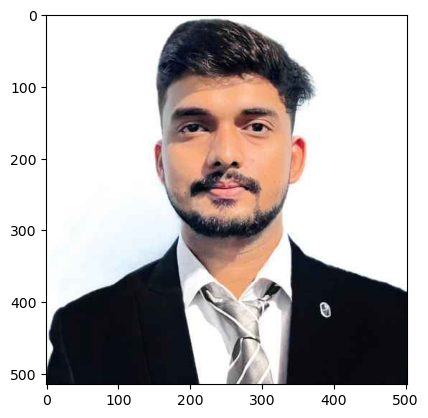

In [58]:
plt.imshow(img)

In [71]:
temp = img.copy()
img_array = np.array(img)
img_shape = img_array.shape
img_shape


(515, 503, 3)